DSC-240 Final Project Rough Draft

## Imports

In [2]:
# == imports ==
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# == data ==

# cancer by age
cancer_age = pd.read_csv('/Users/brianchaffee/Data Science/Projects/Project Data/DSC240/USCS-1999-2020-ASCII/BYAGE.TXT', sep='|')
cancer_age = cancer_age.drop(['CI_LOWER', 'CI_UPPER'], axis=1)

cancer_age = cancer_age[~(cancer_age['COUNT'].str.contains("~", regex=False, na=False))]

cancer_age['COUNT'] = pd.to_numeric(cancer_age['COUNT'], errors='coerce')
cancer_age['RATE'] = pd.to_numeric(cancer_age['RATE'], errors='coerce')
cancer_age['POPULATION'] = pd.to_numeric(cancer_age['POPULATION'], errors='coerce')
cancer_age['YEAR'] = pd.to_datetime(cancer_age['YEAR'], format='%Y', errors='coerce')

cancer_age = cancer_age.dropna()

cancer_age['YEAR'] = cancer_age['YEAR'].dt.year.astype(int)

# cancer by area - ohio - county 
cancer_county = pd.read_csv('data/ohio_cancer_data.csv')

cancer_county = cancer_county.drop(['AGE_ADJUSTED_CI_LOWER', 'AGE_ADJUSTED_CI_UPPER', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER'], axis=1)
cancer_county = cancer_county[~(cancer_county['AGE_ADJUSTED_RATE'].str.contains("~", regex=False, na=False))]
cancer_county['FIPS'] = cancer_county['AREA'].str.extract(r'\((\d+)\)')

cancer_county['COUNT'] = pd.to_numeric(cancer_county['COUNT'], errors='coerce')
cancer_county['AGE_ADJUSTED_RATE'] = pd.to_numeric(cancer_county['AGE_ADJUSTED_RATE'], errors='coerce')
cancer_county['CRUDE_RATE'] = pd.to_numeric(cancer_county['CRUDE_RATE'], errors='coerce')
cancer_county['POPULATION'] = pd.to_numeric(cancer_county['POPULATION'], errors='coerce')

# air emission data - ohio - county
air_emission = pd.read_excel('data/OH-AirPollution-BYCOUNTY.xlsx')

air_emission = air_emission.drop(['SCC Code', 'EIS Sector', 'Source Description', 'SCC LEVEL 4'], axis=1)

/var/folders/zr/916q35rd1b3cg0f59kfyvsfh0000gn/T/ipykernel_8512/1740693507.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  cancer_age = pd.read_csv('/Users/brianchaffee/Data Science/Projects/Project Data/DSC240/USCS-1999-2020-ASCII/BYAGE.TXT', sep='|')


In [109]:
cancer_age.head()

#cancer_county.head()

air_emission.head()

,State,State-County,POLLUTANT,Emissions (Tons),Pollutant Type,SCC LEVEL 1,SCC LEVEL 2,SCC LEVEL 3,EPA Region,FIPS
0,Ohio,OH - Adams,Carbon Dioxide,2.372499,GHG,Mobile Sources,Highway Vehicles - Compressed Natural Gas (CNG),Combination Short-haul Truck,5,39001
1,Ohio,OH - Adams,Carbon Monoxide,0.063043,CAP,Mobile Sources,Highway Vehicles - Compressed Natural Gas (CNG),Combination Short-haul Truck,5,39001
2,Ohio,OH - Adams,Methane,0.028510,GHG,Mobile Sources,Highway Vehicles - Compressed Natural Gas (CNG),Combination Short-haul Truck,5,39001
3,Ohio,OH - Adams,Nitrogen Oxides,0.001218,CAP,Mobile Sources,Highway Vehicles - Compressed Natural Gas (CNG),Combination Short-haul Truck,5,39001
4,Ohio,OH - Adams,Volatile Organic Compounds,0.001149,CAP,Mobile Sources,Highway Vehicles - Compressed Natural Gas (CNG),Combination Short-haul Truck,5,39001


In [104]:
cancer_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189147 entries, 0 to 395892
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   AGE         189147 non-null  object 
 1   COUNT       189147 non-null  float64
 2   EVENT_TYPE  189147 non-null  object 
 3   POPULATION  189147 non-null  int64  
 4   RACE        189147 non-null  object 
 5   RATE        189147 non-null  float64
 6   SEX         189147 non-null  object 
 7   SITE        189147 non-null  object 
 8   YEAR        189147 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 14.4+ MB


In [87]:
stark_cancer = cancer_county[(cancer_county['FIPS'] == '39151')]

print(stark_cancer)
print(cancer_county['FIPS'])

      STATE                      AREA  AGE_ADJUSTED_RATE   COUNT EVENT_TYPE  \
66600    OH  OH: Stark County (39151)              426.7  5720.0  Incidence   
66601    OH  OH: Stark County (39151)              141.8  2131.0  Mortality   
66602    OH  OH: Stark County (39151)                6.8    87.0  Incidence   
66603    OH  OH: Stark County (39151)                4.5    65.0  Mortality   
66604    OH  OH: Stark County (39151)                9.2    93.0  Incidence   
...     ...                       ...                ...     ...        ...   
67481    OH  OH: Stark County (39151)                2.1    52.0  Mortality   
67482    OH  OH: Stark County (39151)                8.1    56.0  Incidence   
67484    OH  OH: Stark County (39151)               14.2   243.0  Incidence   
67486    OH  OH: Stark County (39151)               24.0   604.0  Incidence   
67487    OH  OH: Stark County (39151)                4.8   124.0  Mortality   

       POPULATION                RACE              

## Cancer Visuals

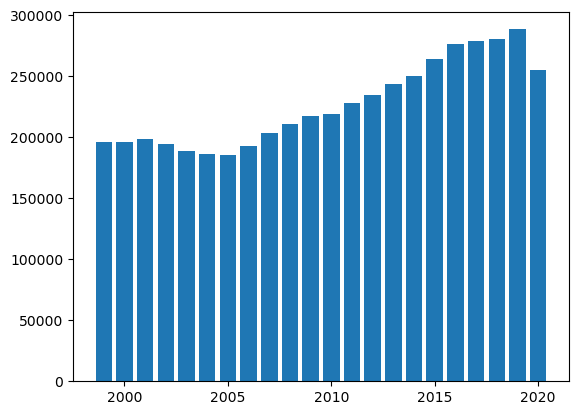

In [89]:
plt.figure()

plt.bar(cancer_age['YEAR'], cancer_age['COUNT'])

plt.show()

In [108]:
# Stark county

stark_cancer = cancer_county[(cancer_county['FIPS'] == '39151')]

stark_cancer_10 = stark_cancer.sort_values(ascending=False).head(10)

stark_cancer_incidence = stark_cancer[(stark_cancer['EVENT_TYPE'] == 'Incidence')]
stark_cancer_mortality = stark_cancer[(stark_cancer['EVENT_TYPE'] == 'Mortality')]

print(stark_cancer)
print(stark_cancer_10)

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

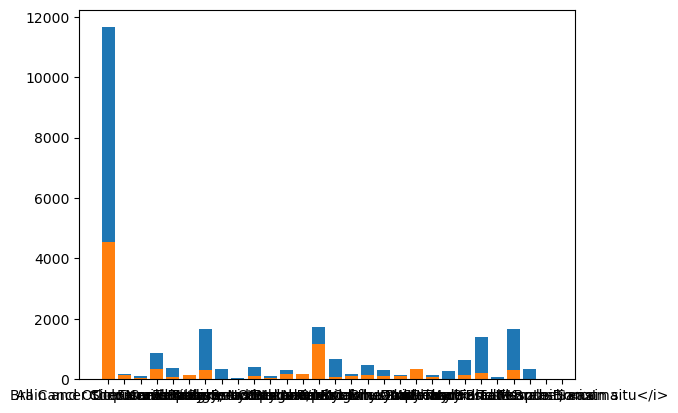

In [100]:
plt.figure()

plt.bar(stark_cancer_incidence['SITE'], stark_cancer_incidence['COUNT'])
plt.bar(stark_cancer_mortality['SITE'], stark_cancer_mortality['COUNT'])

plt.show()

In [106]:
plt.bar(stark_cancer_10['SITE'], stark_cancer_10['AGE_ADJUSTED_RATE'])


KeyError: 'SITE'

## Emission Visuals

In [42]:
top_10_air = air_emission[(air_emission['POLLUTANT'] != 'Carbon Dioxide')]

top_10_air = top_10_air.groupby('POLLUTANT')['Emissions (Tons)'].sum()
top_10_air = top_10_air.sort_values(ascending=False).head(10)

print("Total emissions for each pollutant across all counties:")
print(top_10_air)

Total emissions for each pollutant across all counties:
POLLUTANT
Carbon Monoxide                1.219832e+06
Volatile Organic Compounds     7.229076e+05
PM10 Primary (Filt + Cond)     2.911826e+05
Nitrogen Oxides                1.891950e+05
Ammonia                        9.604937e+04
PM2.5 Primary (Filt + Cond)    8.158807e+04
Methanol                       3.333902e+04
Formaldehyde                   1.039447e+04
Toluene                        9.954067e+03
Acetaldehyde                   9.038528e+03
Name: Emissions (Tons), dtype: float64


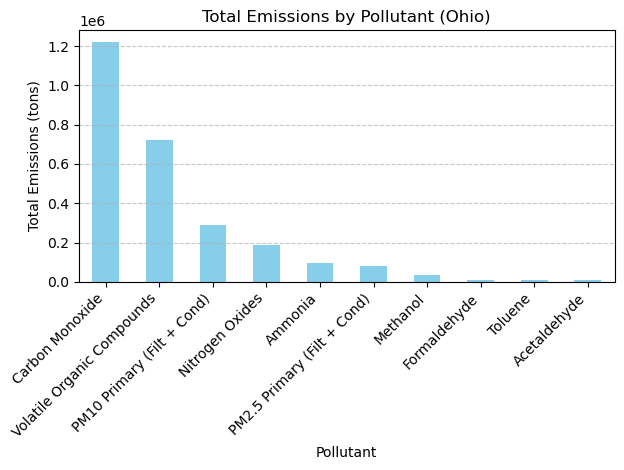

In [44]:
top_10_air.plot(kind='bar', color='skyblue')
plt.title('Total Emissions by Pollutant (Ohio)')
plt.xlabel('Pollutant')
plt.ylabel('Total Emissions (tons)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [40]:
stark_air = air_emission[(air_emission['State-County'] == 'OH - Stark') & (air_emission['POLLUTANT'] != 'Carbon Dioxide')]

stark_air_emis = stark_air.groupby('POLLUTANT')['Emissions (Tons)'].sum()
stark_10_pol = stark_air_emis.sort_values(ascending=False).head(10)


print("Total emissions for each pollutant across all counties:")
print(stark_10_pol)

Total emissions for each pollutant across all counties:
POLLUTANT
Carbon Monoxide                39531.057388
Volatile Organic Compounds     12439.376813
PM10 Primary (Filt + Cond)      6939.069275
Nitrogen Oxides                 4403.699525
PM2.5 Primary (Filt + Cond)     2160.957867
Ammonia                         1311.948753
Methanol                         437.489848
Toluene                          322.641494
Xylenes (Mixed Isomers)          218.291214
Methane                          189.273100
Name: Emissions (Tons), dtype: float64


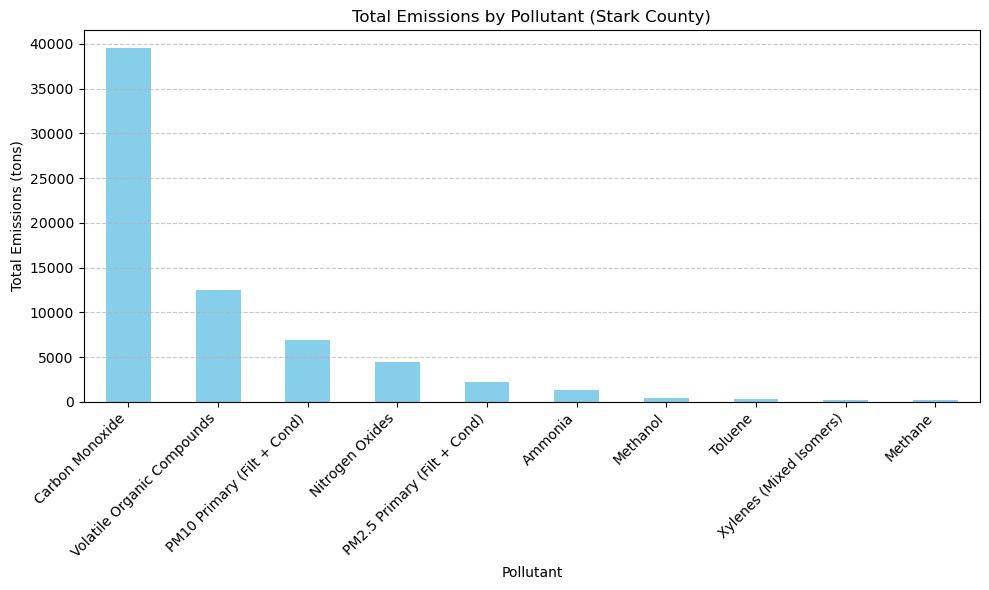

In [41]:
plt.figure(figsize=(10, 6))
stark_10_pol.plot(kind='bar', color='skyblue')
plt.title('Total Emissions by Pollutant (Stark County)')
plt.xlabel('Pollutant')
plt.ylabel('Total Emissions (tons)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
lake_air = air_emission[(air_emission['State-County'] == 'OH - Lake') & (air_emission['POLLUTANT'] != 'Carbon Dioxide')]

lake_air_emis = lake_air.groupby('POLLUTANT')['Emissions (Tons)'].sum()
lake_10_pol = lake_air_emis.sort_values(ascending=False).head(10)


print("Total emissions for each pollutant across all counties:")
print(lake_10_pol)

Total emissions for each pollutant across all counties:
POLLUTANT
Carbon Monoxide                20419.185968
Volatile Organic Compounds      6361.292968
Nitrogen Oxides                 3289.685741
PM10 Primary (Filt + Cond)      3045.903710
PM2.5 Primary (Filt + Cond)     1087.888218
Ammonia                          395.976408
Toluene                          170.389599
Methanol                         161.389120
Xylenes (Mixed Isomers)          118.038495
Methane                          114.568430
Name: Emissions (Tons), dtype: float64


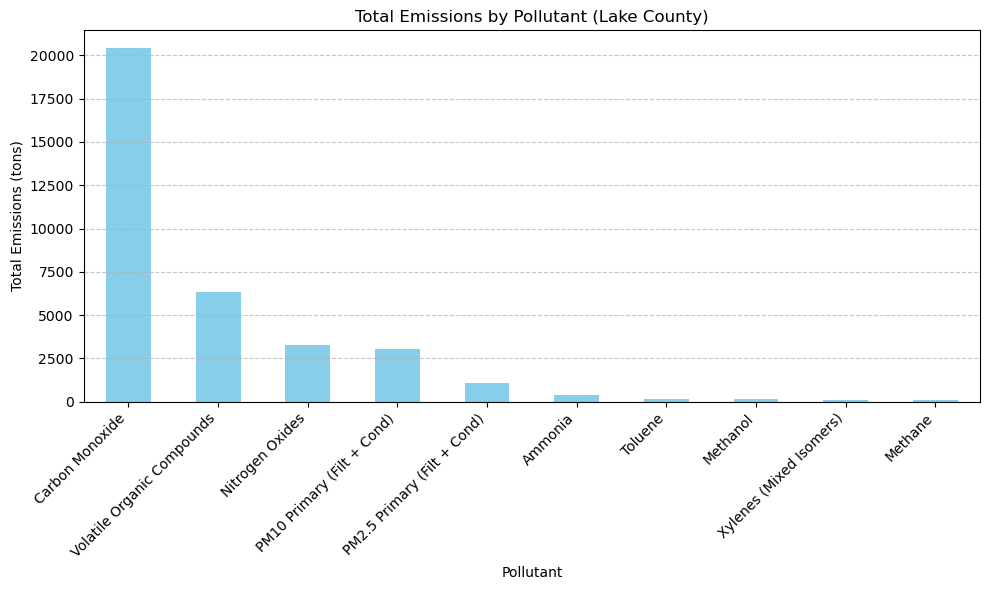

In [47]:
plt.figure(figsize=(10, 6))
lake_10_pol.plot(kind='bar', color='skyblue')
plt.title('Total Emissions by Pollutant (Lake County)')
plt.xlabel('Pollutant')
plt.ylabel('Total Emissions (tons)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()